Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys # max float

In [ ]:
data = load_breast_cancer()
X, Y = data.data, data.target
Y = np.where(Y<=0,-1,1)

In [ ]:
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1  1
 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1  1 -1 -1 -1  1  1  1 -1  1  1 -1 -1
  1  1  1 -1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1 -1
  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1 -1  1  1 -1
 -1  1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1  1  1  1 -1  1
  1 -1 -

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

In [ ]:
# Split the data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [ ]:
print(x_train)
print(y_train)

[[-0.62809409 -0.82144065 -0.64964412 ... -0.7804811  -0.77212695
  -0.85058376]
 [-0.5012542  -0.13899222 -0.52470458 ... -0.56460481 -0.3948354
  -0.64593992]
 [-0.45392588 -0.52722354 -0.46486076 ... -0.44707904 -0.40626848
  -0.59950151]
 ...
 [-0.30815467 -0.5191072  -0.35719715 ... -0.77092784 -0.64794007
  -0.91919192]
 [-0.33749823 -0.32972607 -0.34586414 ...  0.2556701  -0.36369012
  -0.33805588]
 [-0.50788016 -0.26885357 -0.5379725  ... -0.48927835 -0.55489848
  -0.819756  ]]
[ 1  1  1  1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1
  1  1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1
 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1  1  1  1 -1  1 -1
 -1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1  1 -1  1 -1  1  1  1 -1  1 -1  1
  1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1  1 -1
 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1 -1  1  1
 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1  

fitness function ( svm score )

In [ ]:
def svm_score(position):
  #print("function access\n")
  fitness_value=0.0
  C = position[0]
  gamma = position[1]
  selected_indices = [i for i, include_feature in enumerate(position[2:]) if include_feature == 1]
  #print(position)
  #print("selected_indices = ",selected_indices)
  if(len(selected_indices) == 0):
    return 0
  X_selected_train = x_train[:, selected_indices]
  svm_model = SVC(C=C, gamma = gamma)
  svm_model.fit(X_selected_train, y_train)
  y_pred_score = svm_model.predict(X_selected_train)
  score = accuracy_score(y_train, y_pred_score)
  return score


whale class module

In [ ]:
# whale class ( class Variables: rnd, position of the solution, fitness of the solution)
class whale:
	def __init__(self, fitness, dim, minx, maxx, minh, maxh, seed):
		self.rnd = random.Random(seed)
		self.fitness_function = fitness
		self.position = [0.0 for i in range(dim)] # all zeros.
		self.d_whale = [0.0 for i in range(dim)] # deciding whale
		self.label = None
		self.positions_history = []  # list to store positions at each iteration
		self.fitness_history = []

		for i in range(2, dim):
			self.position[i] = ((maxx - minx) * self.rnd.random() + minx) # setting a random position value between the given interval ( x_min, x_max ).

		for i in range(2):
			self.position[i] = ((maxh - minh) * self.rnd.random() + minh) # setting a random position value between the given interval ( x_min, x_max ).

		self.fitness = fitness(self.position) # curr fitness




	def update_position_history(self):
		self.positions_history.append(copy.copy(self.position))
		self.fitness = self.fitness_function(self.position)
		self.fitness_history.append(copy.copy(self.fitness))

	def encoding_function(self):
		threshold = 0.4
		for i in range(2, len(self.position)):
			func_val = 1/(1 + math.exp(-self.position[i]))
			if (func_val <= threshold):
				self.position[i]=0
			else:
				self.position[i]=1

 K means clustering module

In [ ]:
def kmeans_clustering(whalePopulation, k):
    positions = [whale.position for whale in whalePopulation]

    kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)
    labels = kmeans.labels_

    clusters = [[] for _ in range(k)]

    for i, whale in enumerate(whalePopulation):
        cluster_id = labels[i]
        whale.label = cluster_id  # Assign the cluster label to the whale
        clusters[cluster_id].append(whale)

    return clusters


Iterative Print Function Module

In [ ]:
def iterative_print_function(Iter, iter_Fbest, iter_Xbest, n_whales, whalePopulation, dim):
    if Iter % 10 == 0 :
        print("Iter = " + str(Iter) + " best fitness = %.3f" % iter_Fbest)
        print(" C = ", iter_Xbest[0], " Gamma = ", iter_Xbest[1])
        print("Feature Subset = [", end=" ")
        for _ in range(dim):
            print(iter_Xbest[_], end=",")
        print("]", end="\n")
        for i in range(n_whales):
            print("whale",i,end=" ")
            print("cluster",whalePopulation[i].label, end=" ")
            print("position: [[", end=" ")
            for _ in range(dim):
                print(whalePopulation[i].position[_], end=",")
            print("]]", end=" ")
            print("--> d_whale: [", end=" ")
            for _ in range(dim):
                print(whalePopulation[i].d_whale[_], end=",")
            print("]", end=" ")
            print(" ---> Accuracy: (",whalePopulation[i].fitness,")")

        print("-----------------------------")

Graph function module

In [ ]:
def plot_whale_positions(whalePopulation, iteration):
    fig, ax = plt.subplots()

    for whale in whalePopulation:
        if iteration >= len(whale.positions_history):
            continue

        position = whale.positions_history[iteration]
        cluster = whale.label
        color = 'C{}'.format(cluster)

        ax.scatter(position[0], position[1], color=color, label=f'Cluster {cluster}')

    ax.set_xlabel('C')
    ax.set_ylabel('Gamma')
    ax.set_title('Whale Positions')
    plt.show()




3D Graph plotting module

In [ ]:
def plot_3d_path(whale):
    positions = whale.positions_history
    accuracy = whale.fitness_history

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(positions)):
        x = positions[i][0]
        y = positions[i][1]
        z = accuracy[i]

        ax.scatter(x, y, z, c=i, cmap='viridis')

        if i > 0:  # Skip the first point since there's no previous point to connect with
            x_prev = positions[i - 1][0]
            y_prev = positions[i - 1][1]
            z_prev = accuracy[i - 1]

            ax.plot([x_prev, x], [y_prev, y], [z_prev, z], color='gray', linestyle='dotted')

    ax.set_xlabel('C')
    ax.set_ylabel('Gamma')
    ax.set_zlabel('Accuracy')
    ax.set_title('Path of the whale after optimization')

    plt.show()


whale optimization module

In [ ]:


# whale optimization algorithm(WOA)
def woa(fitness, max_iter, n_whales, dim, minx, maxx, minh, maxh, k, kmeans_var_max, plot_iter, best_position_info):
    rnd = random.Random(0)

    # initialize n_whales random whales with given fitness function, maximum iterations, dimensions, upper bound and lower bound of x
    # and seed running from 0 to n_whales-1.
    whalePopulation = [whale(fitness, dim, minx, maxx, minh, maxh, i) for i in range(n_whales)]






    # compute the value of best_position and best_fitness in the whale Population
    # i.e initialize the X_best as all zeros [0, 0, 0,....p times].
    # init as INT_MAX (minimization problem).


    # main loop of woa
    Iter = 0
    kmeans_var = kmeans_var_max

    global_Xbest = [0.0 for i in range(dim)]
    global_Fbest = sys.float_info.min


    while Iter < max_iter:



        # Encoding the positions of the whales
        for i in range(n_whales):
            whalePopulation[i].encoding_function()


        ###################### CLUSTERING CALL MODULE #################################

        if(kmeans_var == kmeans_var_max):
            kmeans_clustering(whalePopulation, k)
            print("\n\n\n K MEANS CLUSTERING \n\n\n")
            kmeans_var = 0

        ###############################################################################


        iter_Xbest = [0.0 for i in range(dim)]
        iter_Fbest = sys.float_info.min
        iter_Xbest_num = 0
        iter_Xbest_label = 0
        #Finding global best
        for i in range(n_whales):
            if (whalePopulation[i].fitness > iter_Fbest):
                iter_Fbest = whalePopulation[i].fitness
                iter_Xbest = copy.copy(whalePopulation[i].position)
                iter_Xbest_num = i
                iter_Xbest_label = whalePopulation[i].label

        if (iter_Fbest > global_Fbest):
            global_Fbest = iter_Fbest
            global_Xbest = copy.copy(iter_Xbest)
            best_position_info[0] = iter_Xbest_num
            best_position_info[1] = iter_Xbest_label
            best_position_info[2] = Iter
            best_position_info[3] = global_Fbest




        # after every 10 iterations
        # print iteration number and best fitness value so far
        iterative_print_function(Iter, iter_Fbest, iter_Xbest, n_whales, whalePopulation, dim)


        # linearly decreased from 2 to 0
        a = 2 * (1 - Iter / max_iter)
        a2 = -1 + Iter * ((-1) / max_iter)


        if(Iter == max_iter):
            break

        ################################### MOVEMENT MODULE ###########################################################

        for i in range(n_whales):




            Xbest = [0.0 for i in range(dim)]
            Fbest = sys.float_info.min

            # replacing Fbest and Xbest if better fitness (lesser value of fitness function) is obtained.
            for j in range(n_whales):  # check each whale
                if ((whalePopulation[j].fitness > Fbest) and (whalePopulation[i].label == whalePopulation[j].label)) :
                    Fbest = whalePopulation[j].fitness
                    Xbest = copy.copy(whalePopulation[j].position)


            A = 2 * a * rnd.random() - a
            C = 2 * rnd.random()
            b = 1
            l = (a2 - 1) * rnd.random() + 1
            p = rnd.random()

            D = [0.0 for i in range(dim)]
            D1 = [0.0 for i in range(dim)]
            Xnew = [0.0 for i in range(dim)]
            Xrand = [0.0 for i in range(dim)]

            # CIRCULAR MOTION for p < 0.5.
            if p < 0.5:

                # Shrinking Net for p < 0.5 and |A| < 1.
                if abs(A) < 1:
                    for j in range(dim):
                        D[j] = abs(C * Xbest[j] - whalePopulation[i].position[j])
                        Xnew[j] = Xbest[j] - A * D[j]
                        whalePopulation[i].d_whale[j] = copy.copy(Xbest[j])

                # Exploration based on Random reference for p < 0.5 and |A| > 1.
                else:
                    p = random.randint(0, n_whales - 1)
                    while p == i:
                        p = random.randint(0, n_whales - 1)

                    Xrand = whalePopulation[p].position

                    for j in range(dim):
                        D[j] = abs(C * Xrand[j] - whalePopulation[i].position[j])
                        Xnew[j] = Xrand[j] - A * D[j]
                        whalePopulation[i].d_whale[j] = copy.copy(Xrand[j])

            # HELICAL MOTION for p > 0.5.
            else:
                for j in range(dim):
                    D1[j] = abs(Xbest[j] - whalePopulation[i].position[j])
                    Xnew[j] = D1[j] * math.exp(b * l) * math.cos(2 * math.pi * l) + Xbest[j]
                    whalePopulation[i].d_whale[j] = copy.copy(Xbest[j])

            for j in range(dim):
                whalePopulation[i].position[j] = Xnew[j]




        ######################### CLIPPING MODULE #####################################################

        for i in range(n_whales):
            # if Xnew < minx OR Xnew > maxx
            # then clip it
            for j in range(2):
                whalePopulation[i].position[j] = max(whalePopulation[i].position[j], minh)
                whalePopulation[i].position[j] = min(whalePopulation[i].position[j], maxh)
            for j in range(2, dim):
                whalePopulation[i].position[j] = max(whalePopulation[i].position[j], minx)
                whalePopulation[i].position[j] = min(whalePopulation[i].position[j], maxx)

            whalePopulation[i].update_position_history()  # store current position in history
        ##############################################################################################


        Iter += 1
        kmeans_var += 1
    # end-while



    #plotting the path
    plot_whale_positions(whalePopulation, plot_iter)
    plot_3d_path(whalePopulation[0])
    # returning the best solution
    return global_Xbest


# ----------------------------


obtaining optimized hyper parameters

In [ ]:
def best_pos_predict():
    print("\nBegin whale optimization algorithm on support vector machines\n")
    dim = len(X[0]) + 2

    fitness = svm_score

    num_whales = 15

    max_iter = 100

    minx = -1.0

    maxx = 1.0

    minh = 0.01

    maxh = 1.0

    k = 7

    kmeans_var_max = 10

    plot_iter = 90

    best_position_info = [0.0 for i in range(4)]

    best_position = woa(fitness, max_iter, num_whales, dim, minx, maxx, minh, maxh, k, kmeans_var_max, plot_iter, best_position_info)
    print("Best Position: ", best_position)
    print("Best Position Info: ", best_position_info)
    return best_position



svm prediction using optimized hyper-parameters


In [ ]:
dim = len(X[0]) + 2
def optimized_pred():
    print("op")
    best_position = best_pos_predict()
    C = best_position[0]
    gamma = best_position[1]
    print("C value:", best_position[0])
    optimized_SVM = SVC(C=C, gamma=gamma, kernel='rbf')
    selected_indices_best = [i for i, include_feature in enumerate(best_position[2:]) if include_feature == 1]
    X_selected_train = x_train[:, selected_indices_best]
    X_selected_test = x_test[:, selected_indices_best]
    optimized_SVM.fit(X_selected_train, y_train)
    optimized_y_pred = optimized_SVM.predict (X_selected_test)
    final_score = accuracy_score(optimized_y_pred, y_test)
    print(" C = ", C, " Gamma = ", gamma)
    print("selected indices of best solution: ", selected_indices_best)
    print("Accuracy of the current Optimized Support Vector Machine: ", final_score)
    return final_score

Accuracy print module

In [ ]:
def accuracy_plot(acc_list):
    x_values = list(range(len(acc_list)))

    # Create a line plot with dotted lines
    plt.plot(x_values, acc_list, marker='o', linestyle='dotted')

    # Adding labels and title
    plt.xlabel('kth cross validation')
    plt.ylabel('Accuracy')
    plt.title('Accuracy During Cross-Validation')

    # Show the plot
    plt.show()

k-fold CV module

In [ ]:
def k_fold_cv(k_cv):
    acc_list = []
    list_sum = 0.0
    for i in range(k_cv):
      print("kcv",i)
      ith_accuracy = optimized_pred()
      acc_list.append(copy.copy(ith_accuracy))
      list_sum = list_sum + ith_accuracy
    print("Accuracy list: ",acc_list )
    print("Accuracy after 10 fold cv: ", list_sum/k_cv)
    accuracy_plot(acc_list)
    return list_sum/k_cv


kcv 0
op

Begin whale optimization algorithm on support vector machines




 K MEANS CLUSTERING 



Iter = 0 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 3 position: [[ 0.4822396787871899,0.8666568284939237,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 6 position: [[ 0.2407536057549969,0.23855787612557447,0,1,1,0,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,1,1,1,0,1,0,0,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 2 cluster 4 position: [[ 0.3318914994735484,0.145330419056602,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 80 best fitness = 0.613
 C =  0.010237196155674063  Gamma =  0.010237196155674063
Feature Subset = [ 0.010237196155674063,0.010237196155674063,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 2 position: [[ 0.010237196155674063,0.010237196155674063,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0.6129032258064516 )
whale 2 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

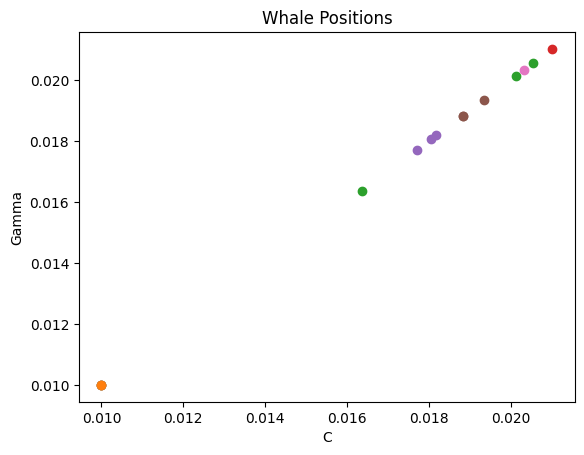

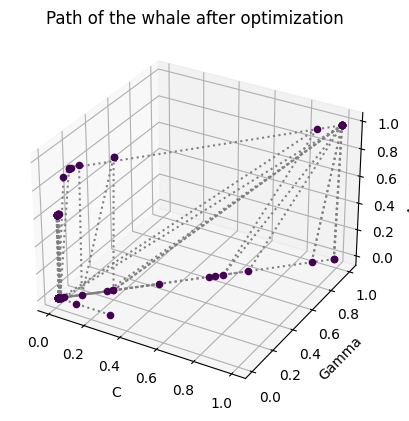

Best Position:  [1.0, 1.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best Position Info:  [3, 3, 3, 0.9882697947214076]
C value: 1.0
 C =  1.0  Gamma =  1.0
selected indices of best solution:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy of the current Optimized Support Vector Machine:  0.9692982456140351
kcv 1
op

Begin whale optimization algorithm on support vector machines




 K MEANS CLUSTERING 



Iter = 0 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 3 position: [[ 0.4822396787871899,0.8666568284939237,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 40 best fitness = 0.988
 C =  1.0  Gamma =  1.0
Feature Subset = [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0 )
whale 1 cluster 3 position: [[ 0.9040301488803123,0.9040301488803123,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.7086050596333919,0.7086050596333919,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9853372434017595 )
whale 2 cluster 1 position: [[ 0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 3 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,

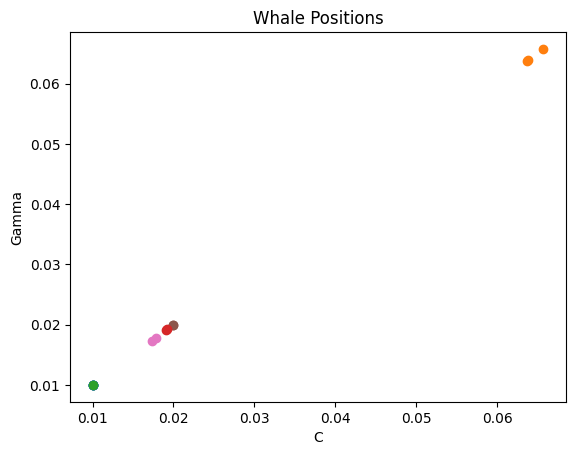

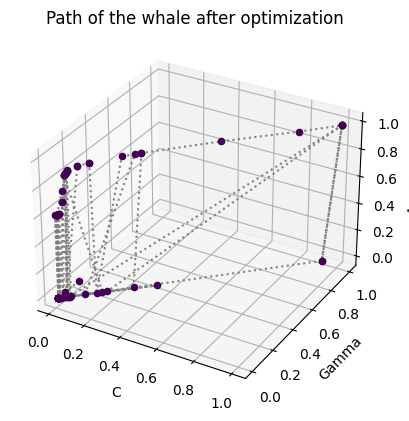

Best Position:  [1.0, 0.9522625053237694, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best Position Info:  [4, 3, 3, 0.9882697947214076]
C value: 1.0
 C =  1.0  Gamma =  0.9522625053237694
selected indices of best solution:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy of the current Optimized Support Vector Machine:  0.9692982456140351
kcv 2
op

Begin whale optimization algorithm on support vector machines




 K MEANS CLUSTERING 



Iter = 0 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 3 position: [[ 0.4822396787871899,0.8666568284939237,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 30 best fitness = 0.988
 C =  1.0  Gamma =  1.0
Feature Subset = [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 1 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 1 cluster 1 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 2 cluster 1 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 3 cluster 1 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 50 best fitness = 0.988
 C =  1.0  Gamma =  1.0
Feature Subset = [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 0 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 2 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 3 cluster 0 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 60 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 1 position: [[ 0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 2 cluster 3 position: [[ 0.02817654592645166,0.02817654592645166,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 80 best fitness = 0.977
 C =  0.40873006151223595  Gamma =  0.40873006151223595
Feature Subset = [ 0.40873006151223595,0.40873006151223595,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 4 position: [[ 0.010237196155674063,0.010237196155674063,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0.6129032258064516 )
whale 2 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

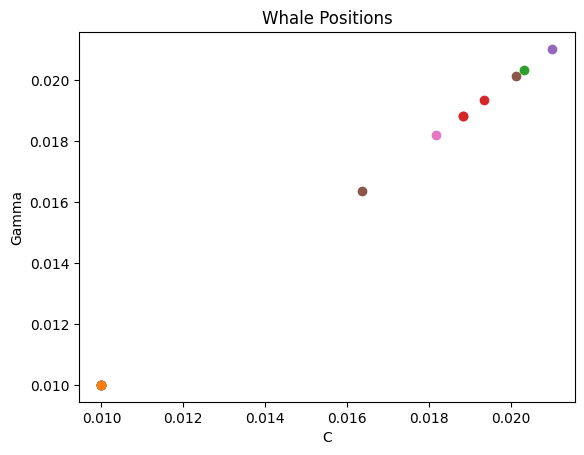

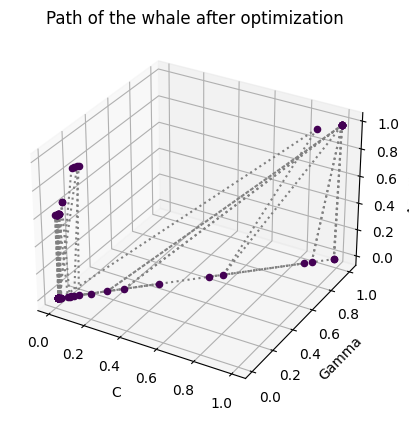

Best Position:  [1.0, 0.6557205516076703, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best Position Info:  [10, 4, 1, 0.9882697947214076]
C value: 1.0
 C =  1.0  Gamma =  0.6557205516076703
selected indices of best solution:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy of the current Optimized Support Vector Machine:  0.9780701754385965
kcv 3
op

Begin whale optimization algorithm on support vector machines




 K MEANS CLUSTERING 



Iter = 0 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 3 position: [[ 0.4822396787871899,0.8666568284939237,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 20 best fitness = 0.988
 C =  1.0  Gamma =  1.0
Feature Subset = [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 3 position: [[ 0.24301943188718436,0.24301943188718436,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0.9648093841642229 )
whale 1 cluster 1 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.010819935500850473,0.010819935500850473,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0 )
whale 2 cluster 2 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 3 cluster 1 position: [[ 0.01,0.01

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 30 best fitness = 0.988
 C =  1.0  Gamma =  1.0
Feature Subset = [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 1 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 2 cluster 1 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 3 cluster 1 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> 

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 60 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 1 position: [[ 0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 2 cluster 3 position: [[ 0.19882829734365343,0.19882829734365343,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 80 best fitness = 0.613
 C =  0.010237196155674063  Gamma =  0.010237196155674063
Feature Subset = [ 0.010237196155674063,0.010237196155674063,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 5 position: [[ 0.010237196155674063,0.010237196155674063,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0.6129032258064516 )
whale 2 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

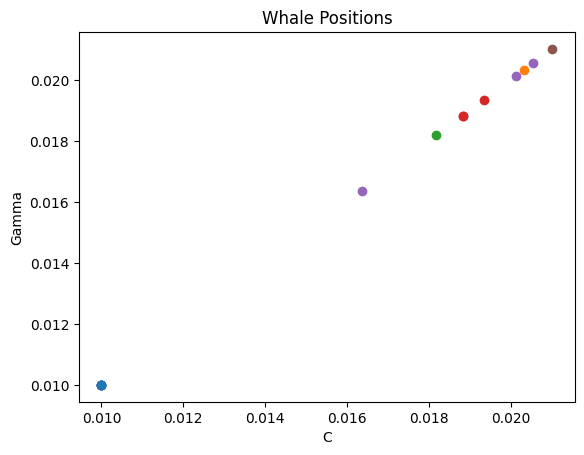

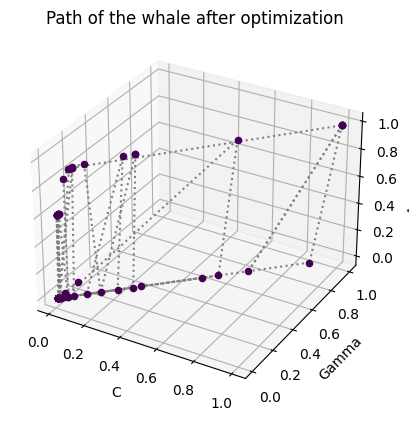

Best Position:  [1.0, 1.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best Position Info:  [10, 4, 1, 0.9882697947214076]
C value: 1.0
 C =  1.0  Gamma =  1.0
selected indices of best solution:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy of the current Optimized Support Vector Machine:  0.9692982456140351
kcv 4
op

Begin whale optimization algorithm on support vector machines




 K MEANS CLUSTERING 



Iter = 0 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 3 position: [[ 0.4822396787871899,0.8666568284939237,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 80 best fitness = 0.982
 C =  0.5595467194716669  Gamma =  0.5595467194716669
Feature Subset = [ 0.5595467194716669,0.5595467194716669,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 5 position: [[ 0.5595467194716669,0.5595467194716669,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.5369092178890494,0.5369092178890494,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9824046920821115 )
whale 1 cluster 4 position: [[ 0.5369092178890494,0.5369092178890494,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.5369092178890494,0.5369092178890494,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9824046920821115 )
whale 2 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

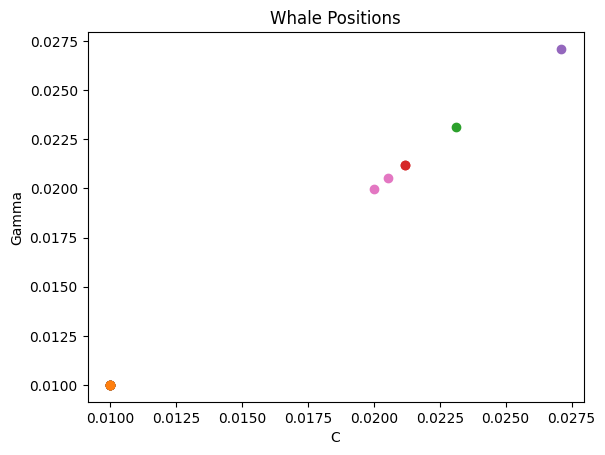

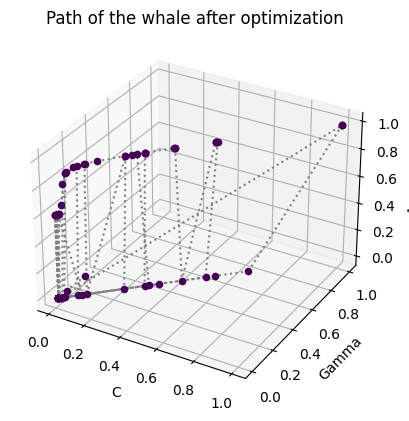

Best Position:  [1.0, 0.6557205516076703, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best Position Info:  [10, 4, 1, 0.9882697947214076]
C value: 1.0
 C =  1.0  Gamma =  0.6557205516076703
selected indices of best solution:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy of the current Optimized Support Vector Machine:  0.9780701754385965
kcv 5
op

Begin whale optimization algorithm on support vector machines




 K MEANS CLUSTERING 



Iter = 0 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 3 position: [[ 0.4822396787871899,0.8666568284939237,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 20 best fitness = 0.988
 C =  1.0  Gamma =  1.0
Feature Subset = [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 4 position: [[ 0.02256287734568516,0.02256287734568516,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0.6129032258064516 )
whale 1 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0 )
whale 2 cluster 1 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.9490690223719206,0.9490690223719206,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 3 cluster 0 position: [[ 0.01,0.01,1

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 40 best fitness = 0.988
 C =  1.0  Gamma =  1.0
Feature Subset = [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 3 position: [[ 0.5127577524902178,0.5127577524902178,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0 )
whale 1 cluster 2 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 2 cluster 5 position: [[ 0.5091874222945086,0.5091874222945086,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.2757884474435262,1.2757884474435262,1.2757884474435262,1.2757884474435262,1.2757884474435262,1.2757884474435262,1.2757884474435262,1.2757884474435262,1.2757884474435262,1.2757884474435262,1.2757884474435262,1.275788

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 80 best fitness = 0.613
 C =  0.010237196155674063  Gamma =  0.010237196155674063
Feature Subset = [ 0.010237196155674063,0.010237196155674063,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 2 position: [[ 0.010237196155674063,0.010237196155674063,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0.6129032258064516 )
whale 2 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

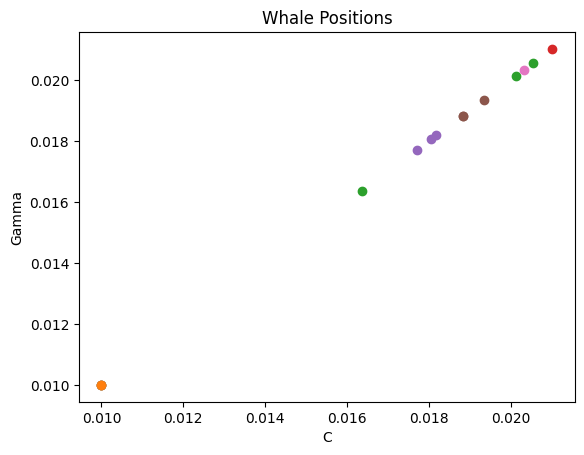

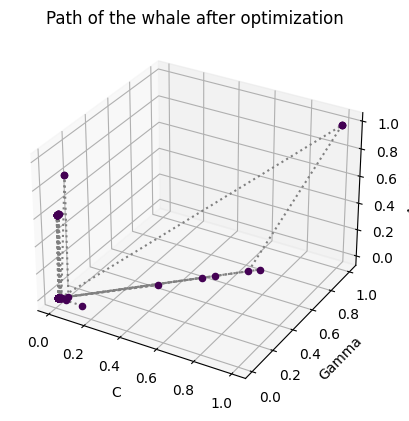

Best Position:  [1.0, 0.9665614386540168, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best Position Info:  [3, 3, 3, 0.9882697947214076]
C value: 1.0
 C =  1.0  Gamma =  0.9665614386540168
selected indices of best solution:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy of the current Optimized Support Vector Machine:  0.9692982456140351
kcv 6
op

Begin whale optimization algorithm on support vector machines




 K MEANS CLUSTERING 



Iter = 0 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 3 position: [[ 0.4822396787871899,0.8666568284939237,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 30 best fitness = 0.988
 C =  1.0  Gamma =  1.0
Feature Subset = [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 2 cluster 1 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 3 cluster 4 position: [[ 0.9009025255841696,0.900902525

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 80 best fitness = 0.924
 C =  0.06097576530221261  Gamma =  0.06097576530221261
Feature Subset = [ 0.06097576530221261,0.06097576530221261,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 2 position: [[ 0.06097576530221261,0.06097576530221261,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0.9237536656891495 )
whale 2 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

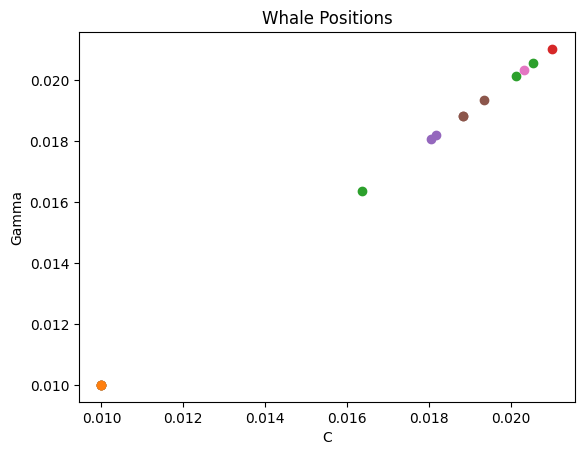

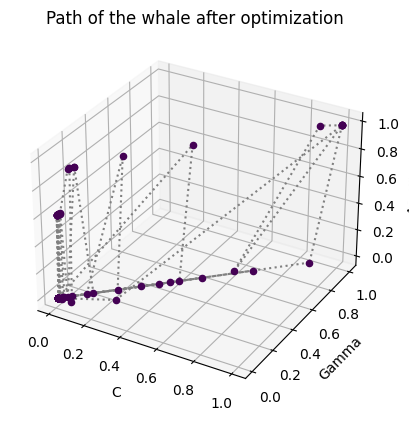

Best Position:  [1.0, 1.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best Position Info:  [10, 4, 1, 0.9882697947214076]
C value: 1.0
 C =  1.0  Gamma =  1.0
selected indices of best solution:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy of the current Optimized Support Vector Machine:  0.9692982456140351
kcv 7
op

Begin whale optimization algorithm on support vector machines




 K MEANS CLUSTERING 



Iter = 0 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 3 position: [[ 0.4822396787871899,0.8666568284939237,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 60 best fitness = 0.988
 C =  1.0  Gamma =  1.0
Feature Subset = [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 1 position: [[ 0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 2 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 3 cluster 

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 80 best fitness = 0.613
 C =  0.010237196155674063  Gamma =  0.010237196155674063
Feature Subset = [ 0.010237196155674063,0.010237196155674063,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 4 position: [[ 0.010237196155674063,0.010237196155674063,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0.6129032258064516 )
whale 2 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

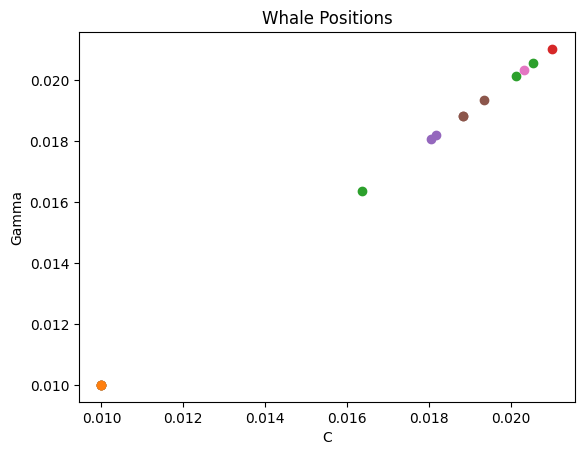

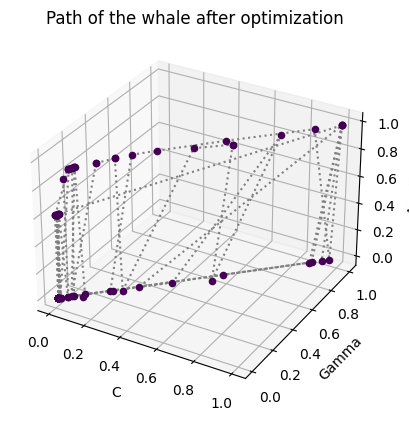

Best Position:  [1.0, 0.9605107012824943, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best Position Info:  [8, 2, 3, 0.9882697947214076]
C value: 1.0
 C =  1.0  Gamma =  0.9605107012824943
selected indices of best solution:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy of the current Optimized Support Vector Machine:  0.9692982456140351
kcv 8
op

Begin whale optimization algorithm on support vector machines




 K MEANS CLUSTERING 



Iter = 0 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 3 position: [[ 0.4822396787871899,0.8666568284939237,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 30 best fitness = 0.988
 C =  1.0  Gamma =  1.0
Feature Subset = [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 2 cluster 1 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 3 cluster 1 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 60 best fitness = 0.982
 C =  0.6194862768464253  Gamma =  0.6194862768464253
Feature Subset = [ 0.6194862768464253,0.6194862768464253,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 1 position: [[ 0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 2 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 80 best fitness = 0.613
 C =  0.010237196155674063  Gamma =  0.010237196155674063
Feature Subset = [ 0.010237196155674063,0.010237196155674063,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 4 position: [[ 0.010237196155674063,0.010237196155674063,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0.6129032258064516 )
whale 2 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

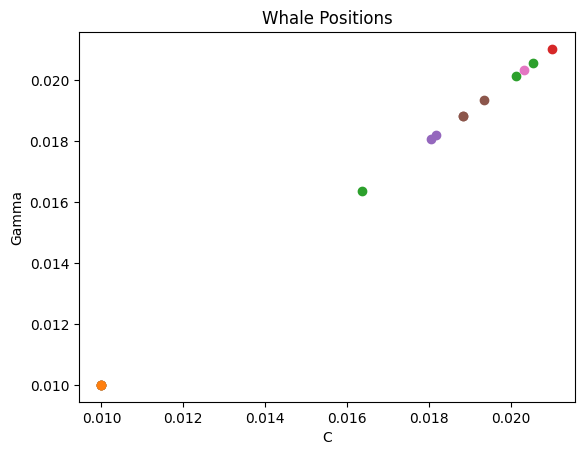

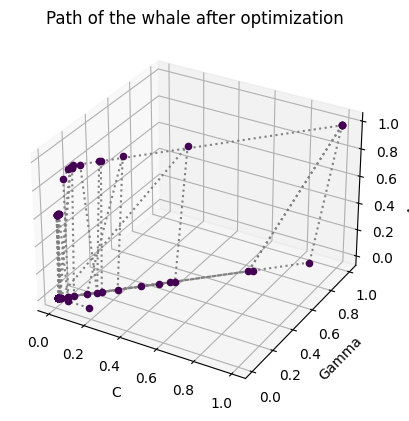

Best Position:  [1.0, 1.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best Position Info:  [10, 4, 2, 0.9882697947214076]
C value: 1.0
 C =  1.0  Gamma =  1.0
selected indices of best solution:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy of the current Optimized Support Vector Machine:  0.9692982456140351
kcv 9
op

Begin whale optimization algorithm on support vector machines




 K MEANS CLUSTERING 



Iter = 0 best fitness = 0.000
 C =  0.0  Gamma =  0.0
Feature Subset = [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]
whale 0 cluster 3 position: [[ 0.4822396787871899,0.8666568284939237,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 50 best fitness = 0.988
 C =  1.0  Gamma =  1.0
Feature Subset = [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 0 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0.9882697947214076 )
whale 1 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 2 cluster 2 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 3 cluster 0 position: [[ 1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,

<ipython-input-189-8c75e32057a1>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(positions)





 K MEANS CLUSTERING 



Iter = 70 best fitness = 0.968
 C =  0.20240060169994245  Gamma =  0.20240060169994245
Feature Subset = [ 0.20240060169994245,0.20240060169994245,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]
whale 0 cluster 0 position: [[ 0.01,0.01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,]  ---> Accuracy: ( 0 )
whale 1 cluster 4 position: [[ 0.203091176915129,0.203091176915129,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]] --> d_whale: [ 0.203502713595641,0.203502713595641,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,]  ---> Accuracy: ( 0 )
whale 2 cluster 1 position: [[ 0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]] --> d_whale: [ 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

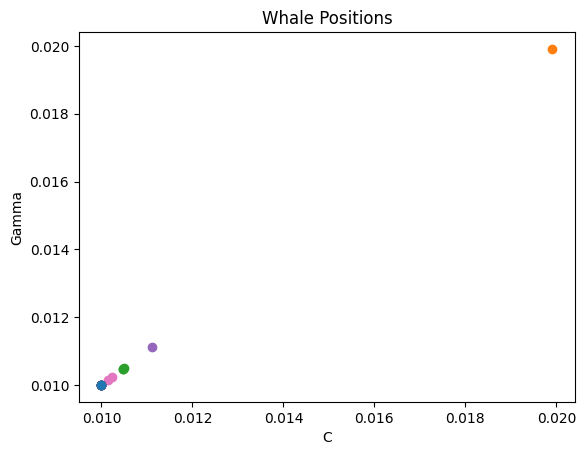

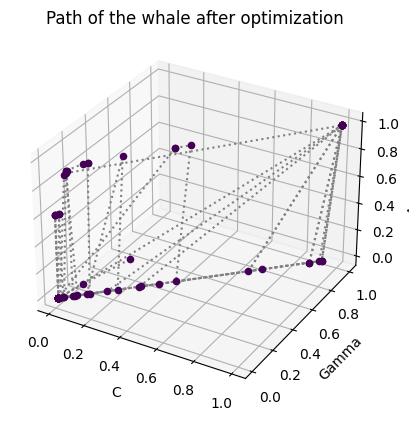

Best Position:  [1.0, 1.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best Position Info:  [12, 0, 1, 0.9882697947214076]
C value: 1.0
 C =  1.0  Gamma =  1.0
selected indices of best solution:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracy of the current Optimized Support Vector Machine:  0.9692982456140351
Accuracy list:  [0.9692982456140351, 0.9692982456140351, 0.9780701754385965, 0.9692982456140351, 0.9780701754385965, 0.9692982456140351, 0.9692982456140351, 0.9692982456140351, 0.9692982456140351, 0.9692982456140351]
Accuracy after 10 fold cv:  0.9710526315789473


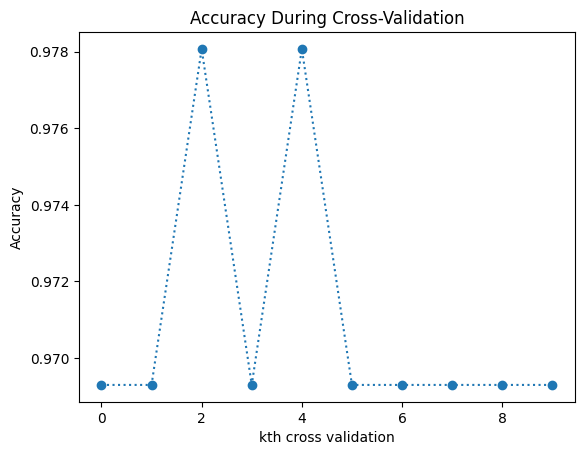

In [ ]:
k_cv = 10
kcv_acc = k_fold_cv(k_cv)


In [ ]:
kernel = 'rbf'
if(kernel=='rbf'):
  normal_SVM = SVC(kernel='rbf', C=1.0, gamma=1.0)
else:
  normal_SVM = SVC(kernel='linear')
normal_SVM.fit(x_train, y_train)
normal_y_pred = normal_SVM.predict (x_test)
normal_score = accuracy_score(normal_y_pred, y_test)
print("Accuracy of the Normal Support Vector Machine: ", normal_score)

Accuracy of the Normal Support Vector Machine:  0.9692982456140351


In [ ]:
if(kcv_acc > normal_score):
  print("IMPROVED ==> ",end=" ")
  print("optimized score: ",kcv_acc," normal score: ",normal_score)
elif(kcv_acc == normal_score):
    print("NOT AFFECTED")
else:
  print("TRY AGAIN")

IMPROVED ==>  optimized score:  0.9710526315789473  normal score:  0.9692982456140351
